In [2]:
from src.database.firebase_manager import get_firebase_data, connect_to_firebase
import pandas as pd
pd.s

In [3]:
connect_to_firebase()

In [40]:
data = get_firebase_data("Perdizes, São Paulo")
df = pd.DataFrame(data)
df.head()

,banheiros,distance,endereço,img1,lat,link,lon,preço,quartos,site,texto,área,vagas,valor_de_condominio
0,3,32.722590,"05014-000, Perdizes, São Paulo, Estado de São ...",https://img-us-1.trovit.com/img1br/y1o1I1Gs1u1...,-23.532482,https://rd.clk.thribee.com/id.y1o1I1Gs1u1qO/or...,-46.666471,10800,3,trovit,"Apto, Perdizes, 3 Quarto, 270 m2 - São Paulo\n...",270,NaN,NaN
1,3,32.724473,"05015-000, Perdizes, São Paulo, Estado de São ...",https://img-us-1.trovit.com/img1br/1X1YV1jdAa1...,-23.531820,https://rd.clk.thribee.com/id.1X1YV1jdAa11/ori...,-46.668472,2640,3,trovit,"Apto, Perdizes, 3 Quarto, 131 m2 - São Paulo\n...",131,NaN,NaN
2,2,32.724473,"05015-000, Perdizes, São Paulo, Estado de São ...",https://img-us-1.trovit.com/img1br/1Q1gYM1w1h1...,-23.531820,https://rd.clk.thribee.com/id.1Q1gYM1w1h1j1y/o...,-46.668472,5500,3,trovit,"Casa, Perdizes, 3 Quarto, 100 m2 - São Paulo\n...",100,NaN,NaN
3,3,32.728535,"05017-020, Perdizes, São Paulo, Estado de São ...",https://img-us-1.trovit.com/img1br/uA12VR1M1jF...,-23.533807,https://rd.clk.thribee.com/id.uA12VR1M1jF/orig...,-46.676205,3200,2,trovit,"Apto, Perdizes, 2 Quarto, 77 m2 - São Paulo\n0...",77,NaN,NaN
4,1,32.728778,"Perdizes, São Paulo, Estado de São Paulo",https://img-us-1.trovit.com/img1br/H1UVU1dO31r...,-23.537929,https://rd.clk.thribee.com/id.H1UVU1dO31r/orig...,-46.680671,5500,3,trovit,"Apartamento, Perdizes, São Paulo\nPerdizes, Sã...",170,NaN,NaN


In [41]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot


In [42]:
temp_df = df[["banheiros", "preço", "quartos", "área", "vagas"]]
temp_df["preço"] = temp_df["preço"] / 1000
temp_df["área"] = temp_df["área"] / 50
temp_df["preço/m²"] = temp_df.eval("preço/área")
X = temp_df.fillna(0).to_numpy()

/tmp/ipykernel_6446/597507640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["preço"] = temp_df["preço"] / 1000
/tmp/ipykernel_6446/597507640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["área"] = temp_df["área"] / 50
/tmp/ipykernel_6446/597507640.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/tmp/ipykernel_6446/1258272254.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["cluster"] = [cluster_names[i]for i in yhat]


TypeError: 'str' object is not callable

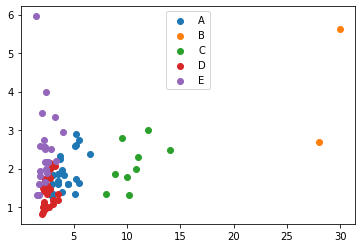

In [56]:
model = KMeans(n_clusters=5)
model.fit(X)
yhat = model.predict(X)

cluster_names = {
    0:'A', 
    1:'B', 
    2:'C', 
    3:'D', 
    4:'E'
}

temp_df["cluster"] = [cluster_names[i]for i in yhat]

clusters = unique(yhat)

for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(X[row_ix, 1], X[row_ix, 5])

pyplot.legend(["A", "B", "C", "D", "E"])
pyplot.xlabel("Preço")
pyplot.show()

In [53]:
temp_df

,banheiros,preço,quartos,área,vagas,preço/m²,cluster
0,3,10800.0,3,270.0,NaN,40.000000,B
1,3,2640.0,3,131.0,NaN,20.152672,E
2,2,5500.0,3,100.0,NaN,55.000000,D
3,3,3200.0,2,77.0,NaN,41.558442,E
4,1,5500.0,3,170.0,NaN,32.352941,D
...,...,...,...,...,...,...,...
80,2,3490.0,3,108.0,2.0,32.314815,D
81,5,6500.0,3,137.0,3.0,47.445255,D
82,2,2100.0,3,105.0,0.0,20.000000,E
83,3,3500.0,3,105.0,3.0,33.333333,D


In [44]:
temp_df["preço"] = temp_df["preço"] * 1000
temp_df["área"] = temp_df["área"] * 50
temp_df["preço/m²"] = temp_df.eval("preço/área")

/tmp/ipykernel_6446/1472253366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["preço"] = temp_df["preço"] * 1000
/tmp/ipykernel_6446/1472253366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["área"] = temp_df["área"] * 50
/tmp/ipykernel_6446/1472253366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [51]:
for cluster in temp_df.cluster.unique():
    df_cluster = temp_df[temp_df.cluster == cluster]
    print(" "*25, cluster)
    display(df_cluster.describe())

                          B


,banheiros,preço,quartos,área,vagas,preço/m²
count,9.000000,9.000000,9.000000,9.000000,3.000000,9.000000
mean,5.444444,10488.888889,4.111111,263.555556,3.666667,41.881310
std,1.424001,1767.374072,0.781736,63.123116,1.154701,11.934144
min,3.000000,8000.000000,3.000000,170.000000,3.000000,26.153846
25%,5.000000,9500.000000,4.000000,240.000000,3.000000,35.842294
50%,5.000000,10200.000000,4.000000,270.000000,3.000000,40.000000
75%,6.000000,11000.000000,5.000000,283.000000,4.000000,49.469965
max,8.000000,14000.000000,5.000000,390.000000,5.000000,60.000000


                          C


,banheiros,preço,quartos,área,vagas,preço/m²
count,36.000000,36.000000,36.000000,36.000000,23.000000,36.000000
mean,2.000000,2615.777778,2.333333,91.000000,1.043478,30.692992
std,0.632456,458.578618,0.534522,26.092144,0.562322,8.840313
min,1.000000,1700.000000,1.000000,58.000000,0.000000,16.393443
25%,2.000000,2247.500000,2.000000,70.000000,1.000000,23.457143
50%,2.000000,2580.000000,2.000000,81.000000,1.000000,30.540541
75%,2.000000,2962.500000,3.000000,114.000000,1.000000,36.747535
max,3.000000,3500.000000,3.000000,147.000000,2.000000,50.000000


                          E


,banheiros,preço,quartos,área,vagas,preço/m²
count,22.000000,22.000000,22.000000,22.000000,19.000000,22.000000
mean,2.954545,4328.409091,2.909091,117.954545,1.842105,37.934558
std,0.950051,957.801782,0.426401,28.053482,0.688247,9.916008
min,1.000000,2900.000000,1.000000,80.000000,1.000000,24.000000
25%,2.250000,3550.000000,3.000000,100.000000,1.000000,32.142857
50%,3.000000,4000.000000,3.000000,109.000000,2.000000,34.000000
75%,3.000000,5187.500000,3.000000,139.250000,2.000000,45.967988
max,5.000000,6500.000000,3.000000,190.000000,3.000000,57.777778


                          A


,banheiros,preço,quartos,área,vagas,preço/m²
count,16.000000,16.000000,16.000000,16.000000,13.000000,16.000000
mean,1.125000,2218.812500,1.125000,45.250000,0.923077,54.168607
std,0.341565,637.523251,0.341565,14.106736,0.277350,22.458441
min,1.000000,1430.000000,1.000000,12.000000,0.000000,26.315789
25%,1.000000,1837.500000,1.000000,39.000000,1.000000,38.375947
50%,1.000000,2200.000000,1.000000,46.500000,1.000000,51.136951
75%,1.000000,2325.250000,1.000000,52.750000,1.000000,60.784314
max,2.000000,4000.000000,2.000000,68.000000,1.000000,119.166667


                          D


,banheiros,preço,quartos,área,vagas,preço/m²
count,2.000000,2.000000,2.000000,2.000000,2.0,2.000000
mean,5.500000,29000.000000,3.500000,394.500000,5.0,83.159620
std,0.707107,1414.213562,0.707107,181.726443,0.0,41.892308
min,5.000000,28000.000000,3.000000,266.000000,5.0,53.537285
25%,5.250000,28500.000000,3.250000,330.250000,5.0,68.348452
50%,5.500000,29000.000000,3.500000,394.500000,5.0,83.159620
75%,5.750000,29500.000000,3.750000,458.750000,5.0,97.970787
max,6.000000,30000.000000,4.000000,523.000000,5.0,112.781955
